## Imports

In [17]:
from qiskit import *

from qiskit.converters import circuit_to_dagdependency
from qiskit.visualization import dag_drawer
from qiskit import QuantumCircuit

from library_template_dev import library_template_matching

from commuting_layer_optimization import *

import warnings
# warnings.filterwarnings('ignore')

## Original circuit

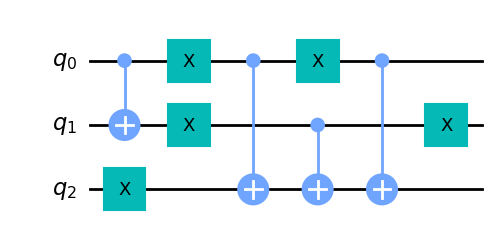

In [18]:
qreg_q = QuantumRegister(3, 'q')

circuit = QuantumCircuit(qreg_q)
circuit.cx(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.x(qreg_q[1])

circuit_dag_dep = circuit_to_dagdependency(circuit)

circuit.draw('mpl')

## First Template

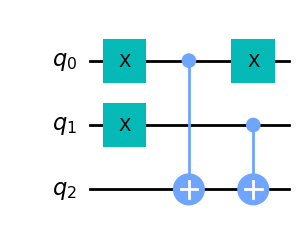

In [19]:
template = QuantumCircuit(qreg_q)
template.x(qreg_q[0])
template.x(qreg_q[1])
template.cx(qreg_q[0], qreg_q[2])
template.cx(qreg_q[1], qreg_q[2])
template.x(qreg_q[0])

template_dag_dep = circuit_to_dagdependency(template)

template.draw('mpl')

## Second Template

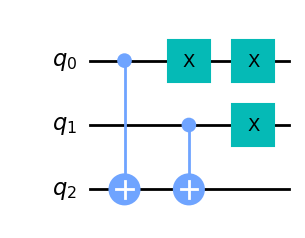

In [20]:
replacement = QuantumCircuit(qreg_q)
replacement.cx(qreg_q[0], qreg_q[2])
replacement.cx(qreg_q[1], qreg_q[2])
replacement.x(qreg_q[0])
replacement.x(qreg_q[0])
replacement.x(qreg_q[1])

replacement_dag_dep = circuit_to_dagdependency(replacement)

replacement.draw('mpl')

True


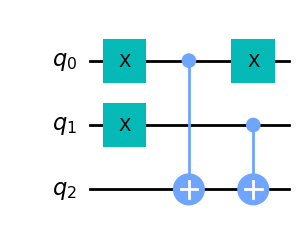

In [21]:
template2 = QuantumCircuit(qreg_q)
template2.cx(qreg_q[1], qreg_q[2])
template2.x(qreg_q[0])
template2.x(qreg_q[0])
template2.x(qreg_q[1])
template2.cx(qreg_q[0], qreg_q[2])


template_dag_dep = circuit_to_dagdependency(template)
print(is_equivalent(template, template2))
template.draw('mpl')

## Confirm template and replacement are equivalent

### This check needs to be added to the library_template_matching function

In [22]:
print(is_equivalent(template, replacement))

True


## Run template matching algorithm

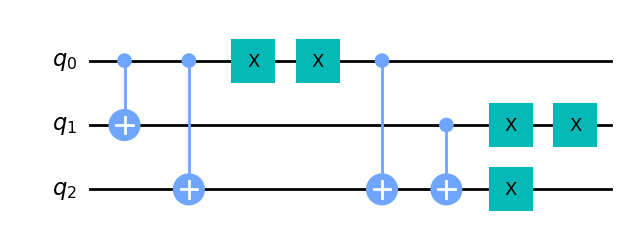

In [23]:
commuted_circuit = library_template_matching(circuit_dag_dep, template_dag_dep, replacement_dag_dep)
commuted_circuit.draw('mpl')

## Check equivalence to ensure algorithm did not change circuit

In [24]:
print(is_equivalent(circuit, commuted_circuit))

True


## Optimize commuted circuit

/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


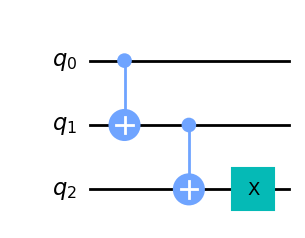

In [25]:
reduced_circ = transpile(circuits=commuted_circuit, optimization_level=3)
reduced_circ.draw('mpl')

## One last equivalence check

In [26]:
print(is_equivalent(circuit, reduced_circ))

True


## TODO:

Add checks to the algorithm to make sure the given templates are equivalent


Consider alternative circuit orientations (current algorithm will only work if the template is exactly matched, not if qubits are shifted around)


Function should (maybe) take a list of tuples where each tuple is a template pair

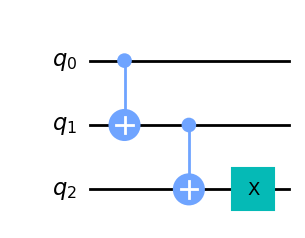

In [27]:
templates = load_templates()
reduced_circ = commuting_layer_optimization(circuit, templates)
reduced_circ.draw('mpl')

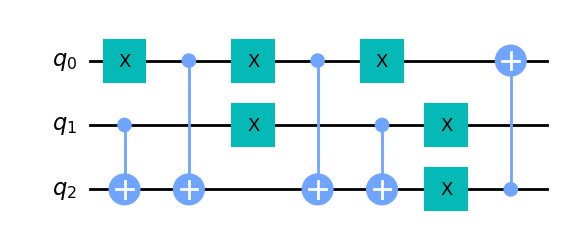

In [28]:
circuit = QuantumCircuit(qreg_q)

circuit.x(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.x(qreg_q[1])
circuit.x(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[0])

qiskit_optimized_circuit = transpile(circuits=circuit, optimization_level=2)

qiskit_optimized_circuit.draw('mpl')

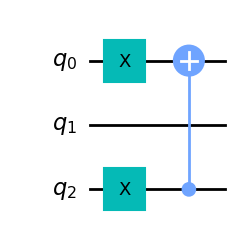

In [29]:
fully_optimized_circ = commuting_layer_optimization(circuit, templates)
fully_optimized_circ.draw('mpl')

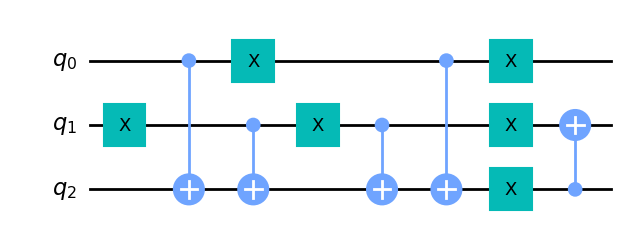

In [30]:
circuit = QuantumCircuit(qreg_q)

circuit.x(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.x(qreg_q[1])
circuit.x(qreg_q[0])
circuit.x(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])

qiskit_optimized_circuit = transpile(circuits=circuit, optimization_level=2)

qiskit_optimized_circuit.draw('mpl')

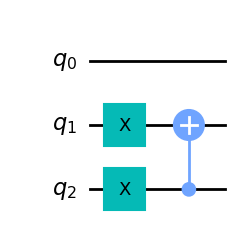

In [31]:
fully_optimized_circ = commuting_layer_optimization(circuit, templates)
fully_optimized_circ = transpile(circuits=fully_optimized_circ, optimization_level=2)
fully_optimized_circ.draw('mpl')

In [32]:
print(is_equivalent(fully_optimized_circ, qiskit_optimized_circuit))

True


## TODO

Fix mutated bits when template matching

Check both replacement templates and pick the one with the greater reduction

Custom optimization plugin